# misc stuff

### median
when trying to compute pixelwise-median for numerous large images, it may not be feasible to hold all in memory... perhaps we can estimate the overall median from the medians of batches of samples?

In [7]:
import math

def median(array):
    return sorted(array)[len(array)//2]


def median_by_batches(array, n_per_batch):
    n_batches = int(math.ceil(len(array) / n_per_batch))
    m = 0.0
    for i in range(n_batches):
        start = i * n_per_batch
        end = start + n_per_batch if i < n_batches-1 else len(array)
        m += median(array[start:end])
    m /= n_batches
    return m

In [2]:
import numpy as np
import seaborn as sns

sns.set()

In [19]:
ave_errors = []

for n in range(2, 101):
    total_error = 0
    for i in range(100):
        arr = np.random.randint(0, 256, n)
        true_median = median(arr)
        est_median = median_by_batches(arr, 40)
        error = abs(true_median-est_median)
        total_error += error
    ave_errors.append(total_error / 100)

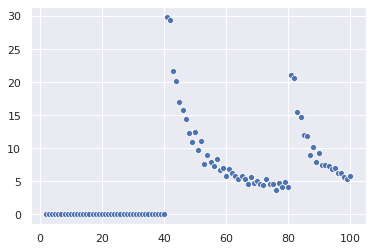

In [20]:
sns.scatterplot(list(range(2, 101)), ave_errors)